In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices("GPU")
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import numpy as np
import math
import pandas
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
number_of_steps = 72
angle_per_step = 360 / number_of_steps
image_count = 5184

In [4]:
def AngleFromNumber(num):
    default_vector = np.array([0,-1,0])
    x = num % number_of_steps
    z = num // number_of_steps
    #print(x, 0, z)
    thetaX = np.pi * ( x * angle_per_step / 180 )
    thetaZ = np.pi * ( z * angle_per_step / 180 )
    #print(thetaX, thetaZ)
    default_vector = x_rotation(default_vector, thetaX)
    #print(default_vector[0],default_vector[1], default_vector[2] )
    default_vector = z_rotation(default_vector, thetaZ)
    #print(default_vector[0],default_vector[1], default_vector[2] )
    default_vector = default_vector.round(8)
    return default_vector
def unit_vector(vector):
    """ Returns the unit vector of the vector."""
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """Finds angle between two vectors"""
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def x_rotation(vector,theta):
    """Rotates 3-D vector around x-axis"""
    R = np.array([[1,0,0],[0,np.cos(theta),-np.sin(theta)],[0, np.sin(theta), np.cos(theta)]])
    return np.dot(R,vector)

def y_rotation(vector,theta):
    """Rotates 3-D vector around y-axis"""
    R = np.array([[np.cos(theta),0,np.sin(theta)],[0,1,0],[-np.sin(theta), 0, np.cos(theta)]])
    return np.dot(R,vector)

def z_rotation(vector,theta):
    """Rotates 3-D vector around z-axis"""
    R = np.array([[np.cos(theta), -np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
    return np.dot(R,vector)
# Направления:
# -X слева ||| +X справа
# -Y спереди ||| +Y сзади
# - Z снизу ||| +Z сверху
#D:\MyBlender\imageGenFinished 0000-5184

0.5 -0.0 0.866


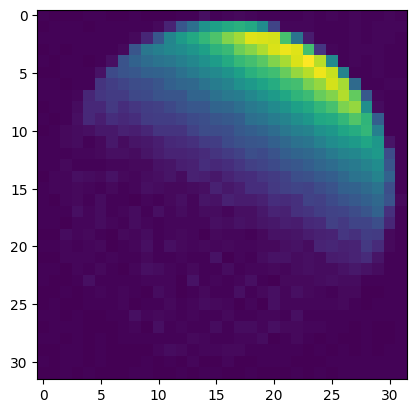

In [8]:
numirusk = 1356
tmp_number_1 = AngleFromNumber(numirusk)
print(tmp_number_1[0].round(4), tmp_number_1[1].round(4), tmp_number_1[2].round(4)) #432
plt.imshow(all_photos[numirusk])

In [9]:
def GetImageAdress(input_number):
    return "imageGenFinished/" + str(input_number).zfill(4) + ".png"
print(GetImageAdress(128))

imageGenFinished/0128.png


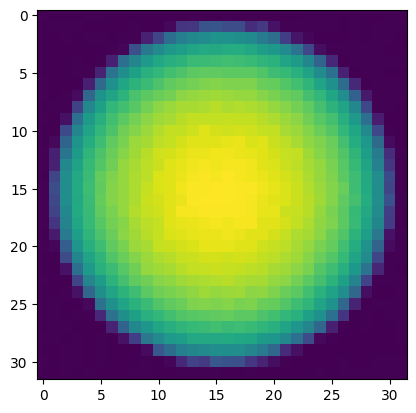

In [10]:
def GetImage(image_number):
    image = Image.open(GetImageAdress(image_number))
    image = image.convert('L')
    image = np.array(image)
    image = image / 255
    return image
plt.imshow(GetImage(0))

In [6]:
"""
# Generate arrays from images
all_photos_raw = list()
all_labels = list()
for pictire in range(0, image_count + 1):
    bw_array = GetImage(pictire)
    all_photos_raw.append(bw_array)
    label = AngleFromNumber(pictire)
    all_labels.append(label)
all_photos = np.array(all_photos_raw)
all_vectors = np.array(all_labels)
print(str(all_photos.shape) + " " + str(all_vectors.shape))
np.save('all_photos.npy', all_photos)
np.save('all_vectors.npy', all_vectors)
"""

'\n# Generate arrays from images\nall_photos_raw = list()\nall_labels = list()\nfor pictire in range(0, image_count + 1):\n    bw_array = GetImage(pictire)\n    all_photos_raw.append(bw_array)\n    label = AngleFromNumber(pictire)\n    all_labels.append(label)\nall_photos = np.array(all_photos_raw)\nall_vectors = np.array(all_labels)\nprint(str(all_photos.shape) + " " + str(all_vectors.shape))\nnp.save(\'all_photos.npy\', all_photos)\nnp.save(\'all_vectors.npy\', all_vectors)\n'

In [11]:
all_photos = np.load('all_photos.npy')
all_vectors = np.load('all_vectors.npy')
train_size = int(0.98 * len(all_vectors))

dataset = tf.data.Dataset.from_tensor_slices((all_photos, all_vectors))
dataset = dataset.shuffle(buffer_size=100, seed=42)

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

train_dataset = train_dataset.batch(32)
test_dataset = test_dataset.batch(32)

print(len(list(train_dataset)), len(list(test_dataset)))
#for images, labels in train_dataset: print(images.shape, labels.shape)
"""
train_photos= all_photos[:train_size]
train_vectors = all_vectors[:train_size]
test_photos = all_photos[train_size:]
test_vectors = all_vectors[train_size:]
print(str(train_photos.shape) + " " + str(train_vectors.shape))
print(str(test_photos.shape) + " " + str(test_vectors.shape))"""

159 4


'\ntrain_photos= all_photos[:train_size]\ntrain_vectors = all_vectors[:train_size]\ntest_photos = all_photos[train_size:]\ntest_vectors = all_vectors[train_size:]\nprint(str(train_photos.shape) + " " + str(train_vectors.shape))\nprint(str(test_photos.shape) + " " + str(test_vectors.shape))'

In [12]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(4, (3, 3), activation='linear', input_shape=(32, 32, 1)),
  #tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(4, (3, 3), activation='linear', input_shape=(32, 32, 1)),
  tf.keras.layers.Conv2D(4, (3, 3), activation='linear', input_shape=(32, 32, 1)),
  tf.keras.layers.Conv2D(4, (3, 3), activation='linear', input_shape=(32, 32, 1)),
    tf.keras.layers.Conv2D(4, (3, 3), activation='linear', input_shape=(32, 32, 1)),
    tf.keras.layers.Conv2D(4, (3, 3), activation='linear', input_shape=(32, 32, 1)),
    tf.keras.layers.Conv2D(4, (3, 3), activation='linear', input_shape=(32, 32, 1)),
    tf.keras.layers.Conv2D(4, (3, 3), activation='linear', input_shape=(32, 32, 1)),

  tf.keras.layers.Flatten(),
  #tf.keras.layers.Dense(48, activation='sigmoid'),
  #tf.keras.layers.Dropout(0.1),
    
  tf.keras.layers.Dense(32, activation='linear'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='linear'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(3)
])
model.compile(optimizer='adam',
              loss='mean_squared_error', 
              metrics=['mean_squared_error'])
              
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 4)         40        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 4)         148       
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 4)         148       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 4)         148       
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 4)         148       
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 4)         148       
                                                                 
 conv2d_6 (Conv2D)           (None, 18, 18, 4)         1

In [17]:
tf.keras.utils.set_random_seed(42)
model.fit(train_dataset, epochs=5)

Epoch 1/5
159/159 [==============================] - 2s 11ms/step - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 2/5
159/159 [==============================] - 2s 10ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 3/5
159/159 [==============================] - 2s 9ms/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 4/5
159/159 [==============================] - 1s 9ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 5/5
159/159 [==============================] - 1s 9ms/step - loss: 0.0093 - mean_squared_error: 0.0093


In [14]:
def ManualCheck(original_index):
    inputt = all_photos[original_index].reshape(1, 32, 32)
    #inputt = inputt.flatten()
    prediction = model.predict(inputt)[0].round(6)
    print("Prediction  : " + str(prediction))
    print("Ground truth: " + str(all_vectors[original_index]))
    print("orig L: " + str(np.linalg.norm(all_vectors[original_index]).round(5)))
    print("pred L: " + str(np.linalg.norm(prediction).round(5)))
    #print(all_photos[original_index][16][16])
    plt.imshow(all_photos[original_index])

1/1 [==============================] - 0s 22ms/step
Prediction  : [-0.002414 -0.872596  0.447394]
Ground truth: [ 0.         -0.90630779  0.42261826]
orig L: 1.0
pred L: 0.98061
4/4 [==============================] - 0s 17ms/step - loss: 0.0035 - mean_squared_error: 0.0035


[0.003496729303151369, 0.003496729303151369]

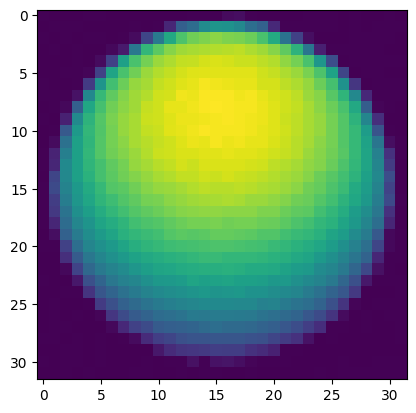

In [22]:
numnum = 67
ManualCheck(numnum)
model.evaluate(test_dataset)
# -X слева ||| +X справа
# -Y спереди ||| +Y сзади
# - Z снизу ||| +Z сверху

In [23]:
model.save("SphereAngle001.keras")